### 합성곱 신경망과 딥러닝
##### 1. 구조
- 기존 신경망
    - fully-connected
    - Affine 계층 사용
- CNN
    - **convolution layer**
        - convolution layer은 형상을 유지 (3차원 → 3차원)
        - 입출력 데이터를 feature map 이라고 함 (input/output feature map)
        - 필터(커널) 연산
    - **pooling layer**

##### 2 합성곱 계층(convolution layer)
- 편향 : 필터를 적용 후 더함
- 패딩(padding)
    - 입력 데이터 주변을 특정 값으로 채움(ex. 0)
    - 출력 크기를 조정할 목적으로 사용
- 스트라이드(stride)
    - 윈도우를 stride만큼 이동
- 합성곱 연산 시 **입력 데이터의 채널 수와 필터의 수가 같아야 함**

##### 3. 풀링 계층(pooling layer)
- 세로, 가로 방향의 공간을 줄이는 연산
- 2*2의 최대 풀링(max pooling)을 stride 2로 처리하는 순서
- 학습해야 할 매개변수가 없다
- 채널 수가 변하지 않는다
- 입력의 변화에 영향을 적게 받는다

### 텐서(Tensor)
- 스칼라(0D tensor)
- 벡터(1D tensor)
- 행렬(2D tensor)
- 시계열데이터(3D tensor) - (samples, timestamps, features)
- 이미지(4D tensor) - (samples, height, width, channels)
- 동영상(5D tensor) - (samples, frames, height, width, channels)

### [Keras](https://talkingaboutme.tistory.com/844)
- tensorflow에 비해 코드 최소화 및 객관적 표현에 초점
- Sequential model vs Functional API
    - Sequential model : layer를 순차적으로 쌓는 모델
    - Functional API     : 다중 출력, 비순환 그래프 모델, 레이어 공유 등 복잡한 구조의 모델 정의에 활용 

In [1]:
## $pip install tensorflow
## $conda install scipy
## $pip install keras
## $pip install h5py

# sequential model ex
# 생성할 신경망 모델 구조
from keras.models import Sequential
model = Sequential()
# Using TensorFlow backend. : 정상 설치 문구

Using TensorFlow backend.


##### 신경망 레이어
- Dense
- Activation
- Dropout
- BachNormalization
- Convolution2D
- Maxpooling2D
- LSTM, SimpleRNN, GRU

##### 기초 함수
1. Dense의 입력 및 출력
    - output_dim : 출력 개수
    - input_dim : 입력 개수
    - input_shape : 입력 형상
2. Activation 함수
    - softmax
    - relu
    - tahn
    - sigmoid
    - hard_sigmoid
3. Optimizer 함수
    - SGD
    - RMSprop
    - Adam
    - Adadelta
    - Adamax
    - Nadam
4. loss 함수
    - mean_squared_error
    - binary_crossentropy
    - categorical_crossentropy
    - sparse_categorical_crossentropy

**모델 학습 (model.fit())**
- x : 입력 데이터
- y : 출력 데이터
- batch_size : 배치크기
- nb_epoch : 학습 epoch 횟수
- validation_split : 0~1사이 실수 (검증 용도로 사용할 데이터 비율)
- validation_data(x, y) : 검증 데이터
- shuffle : epoch마다 샘플 섞을 지 여부
- verbose : 0(없음), 1(진행바), 2(epoch 당)

**모델 평가 : model.evaluate()**
- x : 테스트 입력 데이터
- y : 테스트 출력 데이터
- loss, acc 값 출력

**모델 예측 : model.predict()**

**모델 정보 : model.summary()**

##### EX. MNIST 손글씨 인식

60000 train samples
10000 test samples
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 20s 398us/step - loss: 0.2782 - acc: 0.9159 - val_loss: 0.1173 - val_acc: 0.9644
Epoch 2/10
50000/50000 [==============================] - 21s 413us/step - loss: 0.1131 - acc: 0.9657 - val_loss: 0.0887 - val_acc: 0.9710
Epoch 3/10
50000/50000 [==============================] - 22s 438us/step - loss: 0.0786 - acc: 0.9751 - val_loss: 0.0808 - val_acc: 0.9742
Epoch 4/10
50000/50000 [==============================] - 19s 380us/step - loss: 0.0581 - acc: 0.9811 - val_loss: 0.0730 - val_acc: 0.9789
Epoch 5/10
50000/50000 [==============================] - 19s 384us/step - loss: 0.0480 - acc: 0.9840 - val_loss: 0.0792 - val_acc: 0.9780
Epoch 6/10
50000/50000 [==============================] - 20s 397us/step - loss: 0.0424 - acc: 0.9862 - val_loss: 0.0712 - val_acc: 0.9782
Epoch 7/10
50000/50000 [==============================] - 21s 421us/step - lo

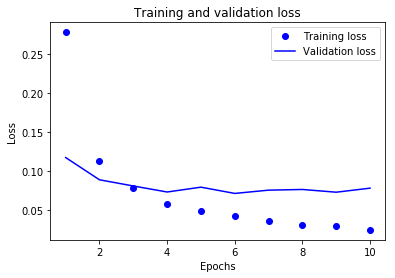

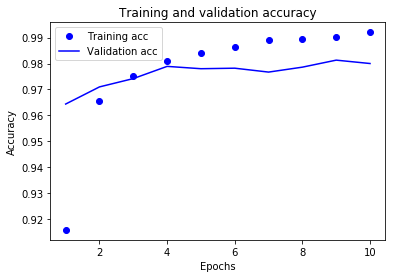

In [10]:
import keras
from keras.datasets import mnist #mnist data 가져오기
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 데이터 전처리 ###
x_train = x_train.reshape(60000, 784) #28*28 > 784
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 모델 구조 정의 ###
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

### 학습 ###
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')
history = model.fit(partial_x_train, partial_y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(model.summary())

# graph

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

##### EX. 보스턴 주택 가격 예측하기

Train on 304 samples, validate on 100 samples
Epoch 1/20
304/304 [==============================] - 1s 3ms/step - loss: 221.7220 - mean_absolute_error: 11.1239 - val_loss: 33.0317 - val_mean_absolute_error: 3.7325
Epoch 2/20
304/304 [==============================] - 1s 2ms/step - loss: 28.5737 - mean_absolute_error: 3.7052 - val_loss: 19.4809 - val_mean_absolute_error: 2.9404
Epoch 3/20
304/304 [==============================] - 1s 2ms/step - loss: 21.0617 - mean_absolute_error: 3.0822 - val_loss: 18.1492 - val_mean_absolute_error: 2.9817
Epoch 4/20
304/304 [==============================] - 1s 2ms/step - loss: 18.4860 - mean_absolute_error: 2.7990 - val_loss: 15.5477 - val_mean_absolute_error: 2.5830
Epoch 5/20
304/304 [==============================] - 1s 2ms/step - loss: 16.6092 - mean_absolute_error: 2.6960 - val_loss: 12.9188 - val_mean_absolute_error: 2.1971
Epoch 6/20
304/304 [==============================] - 1s 2ms/step - loss: 15.6227 - mean_absolute_error: 2.5154 - val_loss

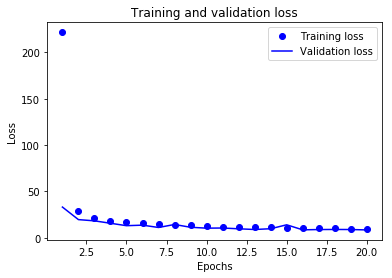

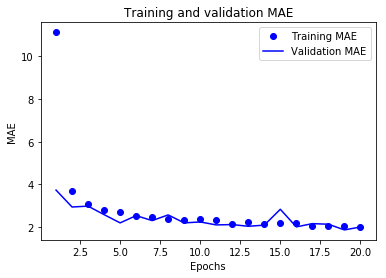

In [11]:
from keras.datasets import boston_housing
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

num_epochs = 20
bath_size = 1

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()
train_data.shape
test_data.shape
train_targets

# 데이터 준비
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

val_data = train_data[:100]
partial_train_data = train_data[100:]
val_targets = train_targets[:100]
partial_train_targets = train_targets[100:]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## 학습 및 모델 평가 ##
history=model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=1,validation_data=(val_data,val_targets))

score = model.evaluate(test_data, test_targets, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(model.summary())

#graph
train_mae = history.history['mean_absolute_error']
train_loss = history.history['loss']
val_mae = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']

epochs = range(1, len(train_mae) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, train_loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()
plt.plot(epochs, train_mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

##### EX. [CNN을 활용한 MNIST 데이터에 대한 손글씨 숫자인식](https://elitedatascience.com/keras-tutorial-deep-learning-in-python)

In [13]:
import numpy as np

np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, pooling
from keras.utils import np_utils

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape) # 28*28를 3*3으로 하면 26번 하고 32개의 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
print(model.output_shape)

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print(model.metrics_names)
print(score)

(60000, 28, 28)
(60000, 28, 28, 1)
(None, 26, 26, 32)
Epoch 1/10
60000/60000 [==============================] - 264s 4ms/step - loss: 0.2088 - acc: 0.9363
Epoch 2/10
60000/60000 [==============================] - 258s 4ms/step - loss: 0.0870 - acc: 0.9740
Epoch 3/10
60000/60000 [==============================] - 238s 4ms/step - loss: 0.0676 - acc: 0.9795
Epoch 4/10
60000/60000 [==============================] - 248s 4ms/step - loss: 0.0557 - acc: 0.9833
Epoch 5/10
60000/60000 [==============================] - 255s 4ms/step - loss: 0.0490 - acc: 0.9852
Epoch 6/10
60000/60000 [==============================] - 244s 4ms/step - loss: 0.0423 - acc: 0.9872
Epoch 7/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0379 - acc: 0.9883
Epoch 8/10
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0331 - acc: 0.9894
Epoch 9/10
60000/60000 [==============================] - 286s 5ms/step - loss: 0.0326 - acc: 0.9898
Epoch 10/10
60000/60000 [============

##### EX. [CNN을 이용한 IMDB 데이터 감성분석](https://github.com/keras-team/keras/tree/master/examples/imdb_cnn.py)

In [2]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

# We evaluate the model performance:
score=model.evaluate(x_test,y_test)
loss = score[0]
accuracy = score[1]
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)
Build model...
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 433s 17ms/step - loss: 0.4039 - acc: 0.8009 - val_loss: 0.3143 - val_acc: 0.8647
Epoch 2/2
25000/25000 [==============================] - 61s 2ms/step

Loss: 0.28, Accuracy: 88.05%


##### EX. [RNN을 활용한 IMDB 데이터 감성분석](https://github.com/rickiepark/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb)

Using TensorFlow backend.


데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.6439 - acc: 0.6130 - val_loss: 0.5626 - val_acc: 0.7090
Epoch 2/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.4072 - acc: 0.8238 - val_loss: 0.4551 - val_acc: 0.7910
Epoch 3/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.3114 - acc: 0.8729 - val_loss: 0.4175 - val_acc: 0.8112
Epoch 4/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.2338 - acc: 0.9084 - val_loss: 0.3954 - val_acc: 0.8320
Epoch 5/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.1719 - acc: 0.9367 - val_loss: 0.3933 - val_acc: 0.8474
Epoch 6/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.1146 - acc: 0.9597 - val_loss: 0.4229 - val_acc: 0.8424
Epoch 7/10


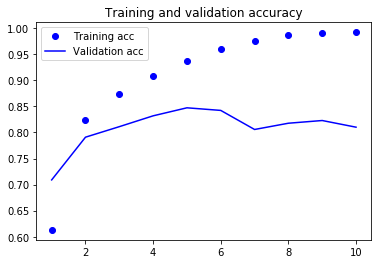

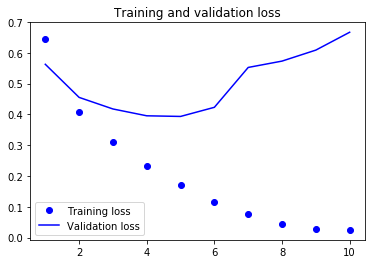

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
import matplotlib.pyplot as plt

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

score=model.evaluate(input_test,y_test)
loss = score[0]
accuracy = score[1]
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()